# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Had to cancel my flight month...
1,✅ Trip Verified | Flight cancelled with no rea...
2,✅ Trip Verified | This is a route I fly regula...
3,✅ Trip Verified | While BA may have made some...
4,✅ Trip Verified | British Airways new Club Sui...


In [7]:
df.to_csv("D:/FRG/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [3]:
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | Had to cancel my flight month...
1,1,✅ Trip Verified | Flight cancelled with no rea...
2,2,✅ Trip Verified | This is a route I fly regula...
3,3,✅ Trip Verified | While BA may have made some...
4,4,✅ Trip Verified | British Airways new Club Sui...


In [4]:
import pandas as pd
from textblob import TextBlob

def sentiment_analysis(review):
    reviews = TextBlob(review)
    return reviews.sentiment.polarity

data['sentiment'] = data['reviews'].apply(sentiment_analysis)

def stmt(pol):
    if pol > 0:
        return 'Positive'
    elif pol < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
data['type'] = data['sentiment'].apply(stmt)

data

,Unnamed: 0,reviews,sentiment,type
0,0,Not Verified | Had to cancel my flight month...,0.112500,Positive
1,1,✅ Trip Verified | Flight cancelled with no rea...,-0.424074,Negative
2,2,✅ Trip Verified | This is a route I fly regula...,0.256863,Positive
3,3,✅ Trip Verified | While BA may have made some...,-0.088708,Negative
4,4,✅ Trip Verified | British Airways new Club Sui...,0.057861,Positive
...,...,...,...,...
995,995,✅ Trip Verified | London Heathrow to Los Angel...,0.490455,Positive
996,996,✅ Trip Verified | CPT is definitely getting it...,0.113221,Positive
997,997,✅ Trip Verified | Sofia to Belfast via London...,-0.157143,Negative
998,998,✅ Trip Verified | Lima to Gatwick. Helpful an...,-0.061111,Negative


In [14]:
sentiment_counts = data['type'].value_counts()
sentiment_counts

type
Positive    620
Negative    370
Neutral      10
Name: count, dtype: int64

<Axes: xlabel='type'>

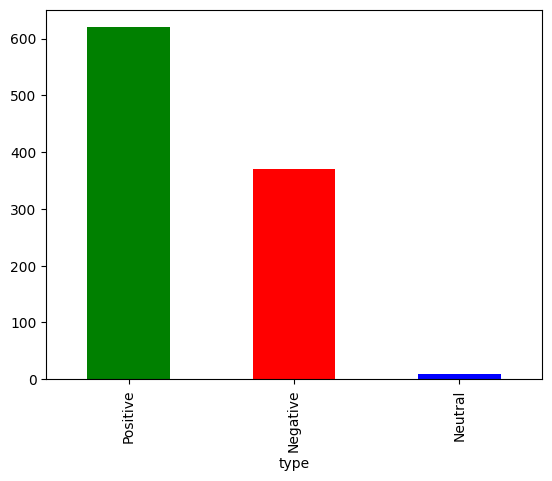

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts.plot(kind='bar',color=['green','red','blue'])
#plt.xlabel("")
#plt.show()

In [16]:
verified = data[data['reviews'].str.contains("Trip Verified")]
not_verified = verified = data[~data['reviews'].str.contains("Trip Verified")]

In [17]:
verified

,Unnamed: 0,reviews,sentiment,type
0,0,Not Verified | Had to cancel my flight month...,0.112500,Positive
6,6,Not Verified | We travel extensively over 25...,0.072544,Positive
15,15,Not Verified | We had a Premium Economy retur...,-0.018618,Negative
25,25,Not Verified | I flew from Malaga via LHR to...,-0.060417,Negative
37,37,Not Verified | British Airways cancelled my ...,-0.202755,Negative
...,...,...,...,...
955,955,❎ Not Verified | London to Olbia. Complete con...,0.067333,Positive
975,975,Not Verified | London to Vancouver. Economy w...,0.300000,Positive
976,976,❎ Not Verified | Newcastle to Delhi via London...,-0.060000,Negative
978,978,Not Verified | London to Sydney via Singapore...,-0.400000,Negative


type
Positive    151
Negative     89
Neutral       2
Name: count, dtype: int64
type
Positive    151
Negative     89
Neutral       2
Name: count, dtype: int64


Text(0.5, 1.0, 'Not Verified')

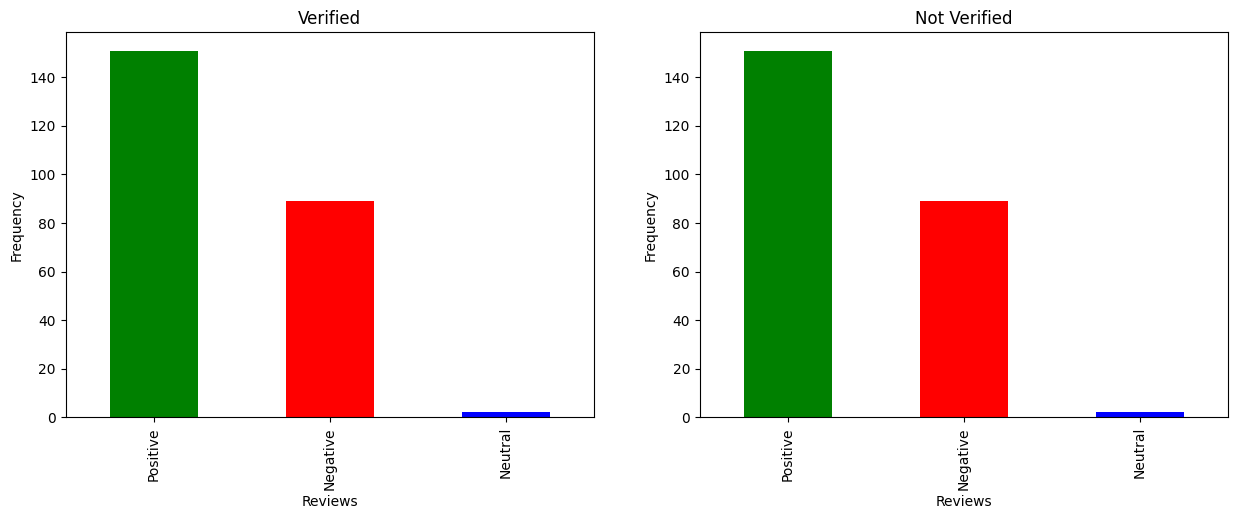

In [30]:
v_counts = verified['type'].value_counts()
not_verified_counts = not_verified['type'].value_counts()

print(v_counts)
print(not_verified_counts)

fig, ax = plt.subplots(1,2,figsize = (15,5))
v_counts.plot(kind='bar',color=['green','red','blue'],ax=ax[0])
ax[0].set_xlabel("Reviews")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Verified")
not_verified_counts.plot(kind='bar',color=['green','red','blue'],ax=ax[1])
ax[1].set_xlabel("Reviews")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Not Verified")

In [31]:
from wordcloud import WordCloud

all_reviews = ' '.join(reviews['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

wordcloud

NameError: name 'reviews' is not defined